2023-08-14 13:36:05.069988: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-14 13:36:05.835914: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


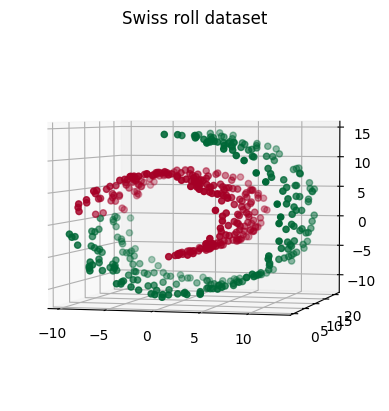

2023-08-14 13:36:08.409037: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


(<tensorflow_datasets.core.dataset_utils._IterableDataset at 0x7f9610155290>,
 <tensorflow_datasets.core.dataset_utils._IterableDataset at 0x7f95cc688e50>)

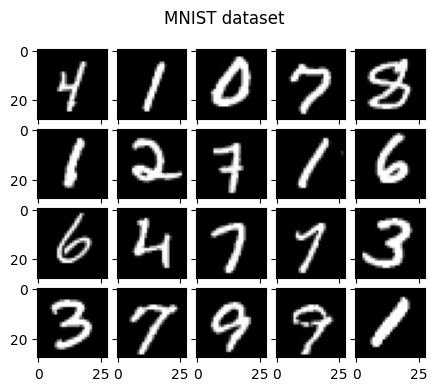

In [1]:
import matplotlib.pyplot as plt
import quantum_transformers.qmlperfcomp.jax_backend as qpcjax
qpcjax.data.get_swiss_roll_dataloaders(plot=True)
qpcjax.data.get_mnist_dataloaders(plot=True)

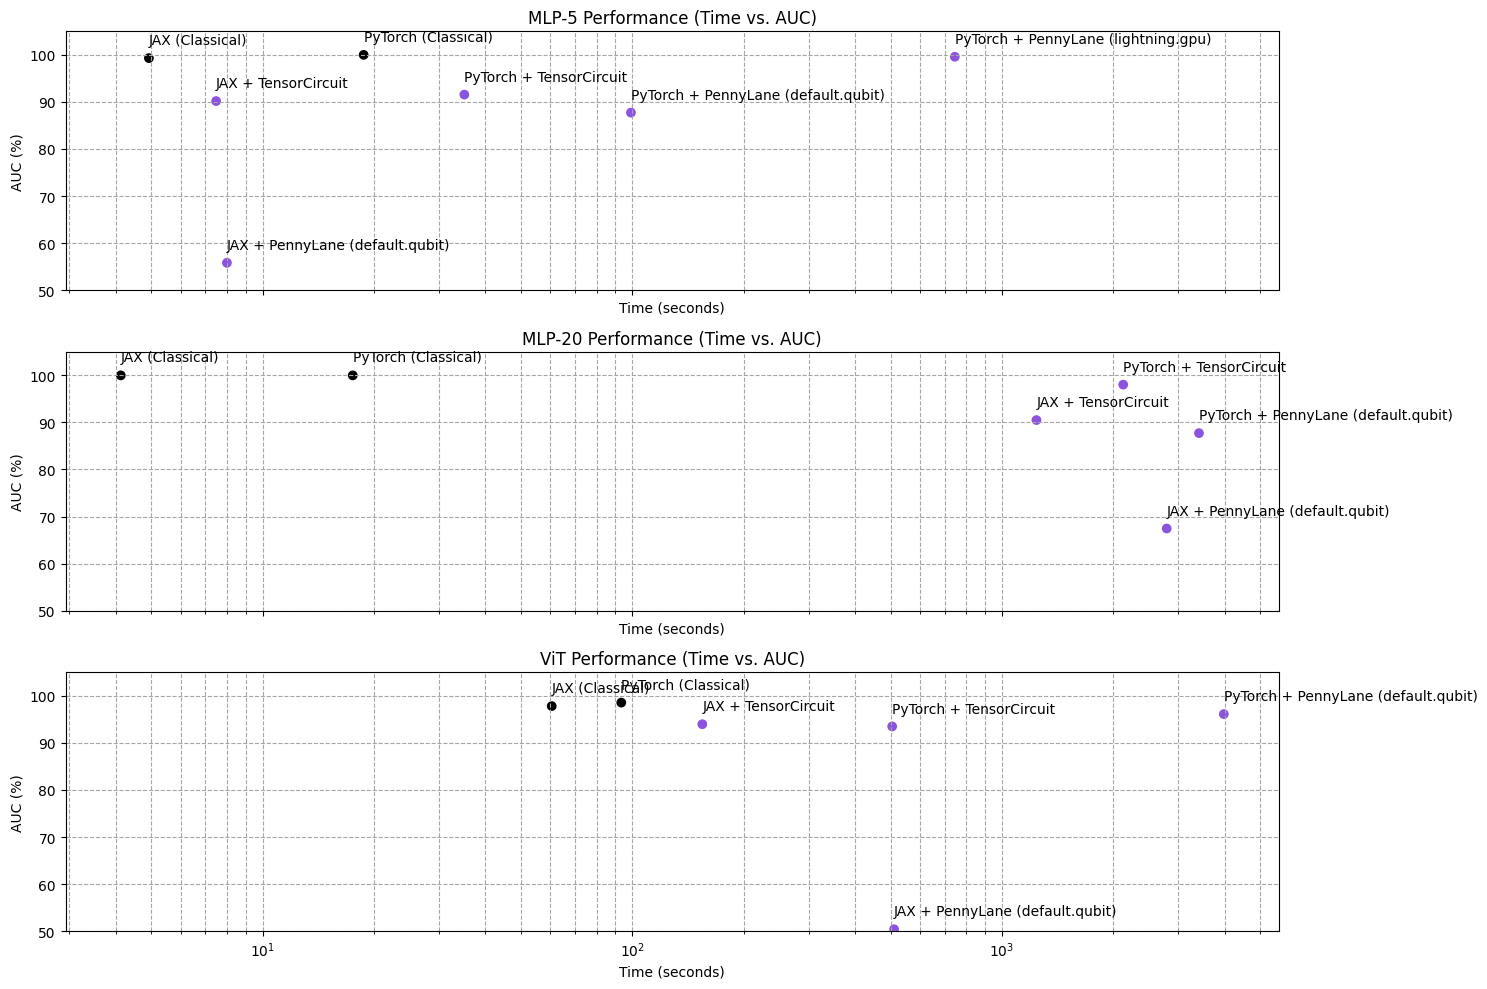

In [25]:
mlp5_time = {
    "PyTorch (Classical)": 18.75,
    "PyTorch + PennyLane (default.qubit)": 99.11,
    "PyTorch + PennyLane (lightning.gpu)": 745.31,
    "PyTorch + TensorCircuit": 35.11,
    "JAX (Classical)": 4.92,
    "JAX + PennyLane (default.qubit)": 8.00,
    "JAX + TensorCircuit": 7.48,
}

mlp5_auc = {
    "PyTorch (Classical)": 100.00,
    "PyTorch + PennyLane (default.qubit)": 87.72,
    "PyTorch + PennyLane (lightning.gpu)": 99.60,
    "PyTorch + TensorCircuit": 91.55,
    "JAX (Classical)": 99.31,
    "JAX + PennyLane (default.qubit)": 55.80,
    "JAX + TensorCircuit": 90.18,
}

mlp20_time = {
    "PyTorch (Classical)": 17.52,
    "PyTorch + PennyLane (default.qubit)": 3411.80,
    # "PyTorch + PennyLane (lightning.gpu)*": ((3+3+3+3+3)*60+30+30+39+42+39)/5*50,
    "PyTorch + TensorCircuit": 2128.16,
    "JAX (Classical)": 4.13,
    "JAX + PennyLane (default.qubit)": 2790.32,
    "JAX + TensorCircuit": 1239.42,
}

mlp20_auc = {
    "PyTorch (Classical)": 100.00,
    "PyTorch + PennyLane (default.qubit)": 87.72,
    "PyTorch + TensorCircuit": 98.03,
    "JAX (Classical)": 100.00,
    "JAX + PennyLane (default.qubit)": 67.45,
    "JAX + TensorCircuit": 90.50,
}

vit_time = {
    "PyTorch (Classical)": 93.33,
    "PyTorch + PennyLane (default.qubit)": 3982.81,
    # "PyTorch + PennyLane (lightning.gpu)*": 260.83*938*50, # 938 batches, 50 epochs
    "PyTorch + TensorCircuit": 504.57,
    "JAX (Classical)": 60.51,
    "JAX + PennyLane (default.qubit)": 510.67,
    "JAX + TensorCircuit": 154.64,
}

vit_auc = {
    "PyTorch (Classical)": 98.57,
    "PyTorch + PennyLane (default.qubit)": 96.13,
    "PyTorch + TensorCircuit": 93.51,
    "JAX (Classical)": 97.83,
    "JAX + PennyLane (default.qubit)": 50.40,
    "JAX + TensorCircuit": 93.98,
}

def make_scatterplot(time, auc, title, ax):
    assert time.keys() == auc.keys()

    colors = ['black' if 'Classical' in label else '#8b54df' for label in time.keys()]

    ax.scatter(time.values(), auc.values(), c=colors)

    # Annotating each point
    for label in time.keys():
        ax.annotate(label, (time[label], auc[label]), textcoords="offset points", xytext=(0, 10))

    ax.set_title(title)
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel("AUC (%)")
    ax.set_xscale("log")
    ax.set_ylim(50, 105)
    ax.grid(True, which="both", ls="--", c='0.65')

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

make_scatterplot(mlp5_time, mlp5_auc, "MLP-5 Performance (Time vs. AUC)", ax1)
make_scatterplot(mlp20_time, mlp20_auc, "MLP-20 Performance (Time vs. AUC)", ax2)
make_scatterplot(vit_time, vit_auc, "ViT Performance (Time vs. AUC)", ax3)

plt.tight_layout()
plt.show()